## Linear Programme

Example: Basic Linear Programme

A company receives in sales 20 per book & 18 per calculator.
The cose per unit to manufacture each book and calculator are 5 and 4, respectively.
The monthly (30 day) cost must not exceed $27,000 / month.
It takes 5 minutes to produce a book and 15 minutes to produce a calculator.

How many unit should be produced of books and calculators to maximise sales and profit.

From this problem we must determine all variables and constraints:

Sales

Book = 20,
Calculator = 18

S = 20b + 18c

Cost <= $27,000 / month:

Book = 5, 
Calculator = 4

5b + 4c <= 27,000

Time to produce:

Minutes in a month (30 days)
30(24*60) = 43,200 minutes

Book = 5 minutes,
Calculator 15 minutes

5b + 15c <= 43,200

Thus this is now the problem to solve:

Maximise S = 20b + 18c

s.t 
   5b + 4x <= 27,000,
   5b + 15c <= 43,200

In order to solve this, vector points for both variable constraints must be plotted in order to determine the feasible region of the optimisation.

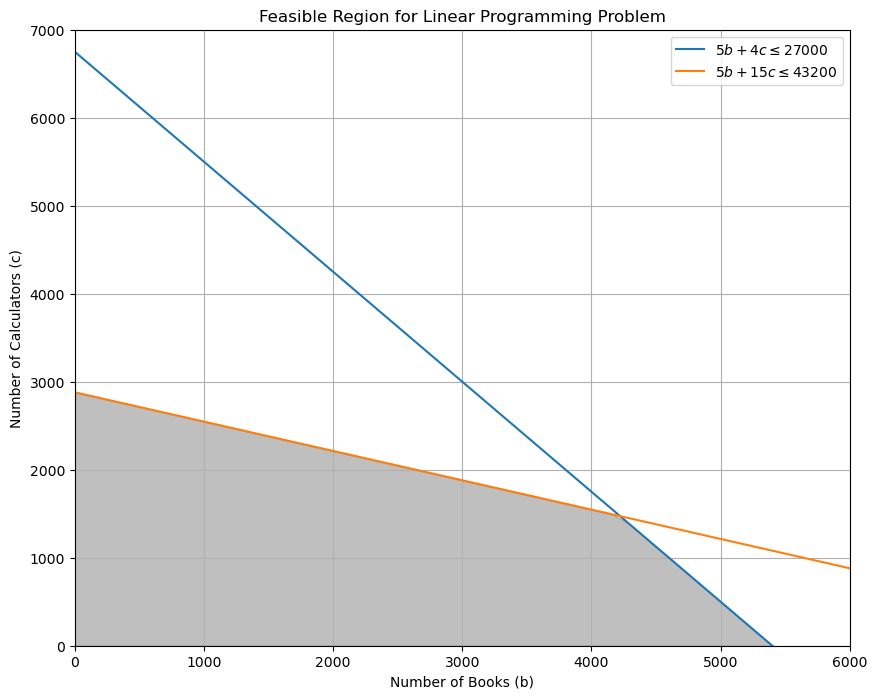

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for b (books) and c (calculators)
b = np.linspace(0, 6000)
c1 = (27000 - 5 * b) / 4
c2 = (43200 - 5 * b) / 15

# Feasible region constraints
plt.figure(figsize=(10, 8))
plt.plot(b, c1, label=r'$5b + 4c \leq 27000$')
plt.plot(b, c2, label=r'$5b + 15c \leq 43200$')

# Fill the feasible region
plt.fill_between(b, np.minimum(c1, c2), where=(c1 >= 0) & (c2 >= 0), color='gray', alpha=0.5)

# Plot settings
plt.xlim((0, 6000))
plt.ylim((0, 7000))
plt.xlabel('Number of Books (b)')
plt.ylabel('Number of Calculators (c)')
plt.legend()
plt.title('Feasible Region for Linear Programming Problem')
plt.grid(True)

# Show plot
plt.show()

To solve for the maximum vector of sales (in terms of b, c), we would have to find common multiples of both constraints and deduct either or to solve for one variables (c or b) and then use results to solve for the other and that would give us the optimal points.

We will round any values since we want integers for our answers. 

5b + 4c <= 27,000

5b + 15c <= 43,200

5b is already in common thus:
5b + 15c <= 43,200 

- 

5b + 4c <= 27,000 

=

11c <= 16,00
c <= (16,200 / 11) <= 1473

Now plugging 1473 into 5b + 4(1473) <= 27,000

5b + 5892 <= 27,000
b <= 4221

Thus our vector for maximising sales is:

S = (4221, 1473) as shown by graph.

Thus from this we can plug these values back into the objective function to determine sales and use the fixed value of cost at 27,000 to determine profits. 

20(4221) + 18(1473) = $110934 / month

110934 - 27000 = $83,934 / month

#### Here is an algorithm to solve this problem alternatively

In [2]:
# Mixed Integer Linear Problem

import pulp

# Define the problem
problem = pulp.LpProblem("Maximize_Sales", pulp.LpMaximize)

# Define the decision variables with integer constraints
b = pulp.LpVariable('b', lowBound=0, cat='Integer')
c = pulp.LpVariable('c', lowBound=0, cat='Integer')

# Define the objective function
problem += 20 * b + 18 * c, "Total Sales"

# Define the constraints
problem += 5 * b + 4 * c <= 27000, "Cost Constraint"
problem += 5 * b + 15 * c <= 43200, "Time Constraint"

# Solve the problem
status = problem.solve()

# Output the results
if pulp.LpStatus[status] == 'Optimal':
    print(f"Optimal value (Maximum Sales): {pulp.value(problem.objective)}")
    print(f"Number of books (b): {pulp.value(b)}")
    print(f"Number of calculators (c): {pulp.value(c)}")
    print(f"Maximum Profit: {pulp.value(problem.objective) - 27000}") 
else:
    print("No optimal solution found")

Optimal value (Maximum Sales): 110940.0
Number of books (b): 4224.0
Number of calculators (c): 1470.0
Maximum Profit: 83940.0


In [3]:
# Non Integer Linear Programme

from scipy.optimize import linprog
c = [-20, -18]
a = [[5, 4], [5, 15]]
b = [27000, 43200]
bound = (0, None)

sol = linprog(c, A_ub=a, b_ub=b, bounds=[bound, bound], method='highs') 

print(f"Maximum Proft: {-sol.fun}")
print(f"Optimal Solutions: Books = {sol.x[0]}, Calculators = {sol.x[1]}")

Maximum Proft: 110945.45454545456
Optimal Solutions: Books = 4221.818181818182, Calculators = 1472.7272727272727


In [4]:
from gekko import GEKKO

m = GEKKO()
b,c= m.Array(m.Var, 2,lb=0)
m.Maximize(20*b + 18*c)
m.Equation(5*b + 4*c <= 27000)
m.Equation(5*b + 15*c <= 43200)
m.solve(disp=False)

print(f"Optimal Solutions: B = {b.value[0]}, C = {c.value[0]}")
print(f"Maximum Profit: {-m.options.objfcnval}")

Optimal Solutions: B = 4221.8181818, C = 1472.7272727
Maximum Profit: 110945.45455


As we can see here, there is more precision from this algorithm as these values add up exactly to 27,000 for the cost constraint and to 43,200 for the time constraint. 

# Quadratic Programme

Example: Basic Quadratic Programme

#### ✅ Activity: Solve the Quadratic Programming (QP) Problem

$\begin{align}\mathrm{maximize} \quad & \frac{1}{2} \left(x^2+y^2\right) -2x+2y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

Use either `gekko` or `scipy` to solve the QP and report the results for `x`, `y`, and the objective function value.

In [5]:
from gekko import GEKKO

In [6]:
m = GEKKO()
x, y = m.Array(m.Var,2, lb=0)
m.Maximize(0.5 * (x**2 + y**2) - 2*x + 2*y)
m.Equation([6*x + 4*y <=24, x + 2*y <6, y-x<=1, 0<=y, y<= 2, x>=0])
m.solve(disp=False)
xopt = x.value[0]
yopt = y.value[0]        
print(f"Optimal Solutions: x = {xopt}, y = {yopt}")
print(f"Maximum Value: {m.options.OBJFCNVAL}")  

Optimal Solutions: x = 0.99999999792, y = 2.0000000075
Maximum Value: -4.5000000321


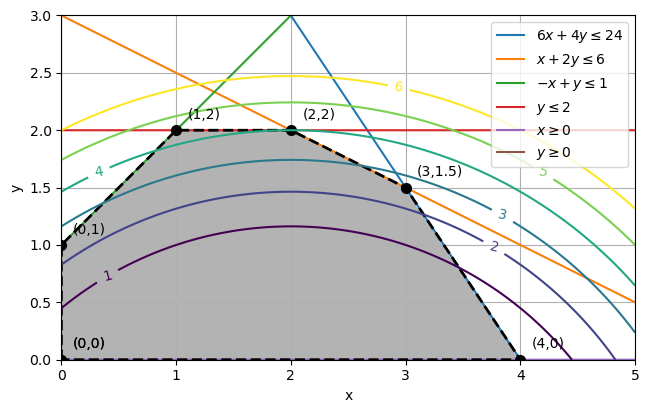

In [7]:
# visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = 0.5*(x**2+y**2)-2*x+2*y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int), 
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()

## Reason to be cautious with a linear algorithm in context to this project.

Linear programming (LP) models can exhibit biases, particularly when the objective is to maximize returns without directly considering risk, leading to highly concentrated portfolios. This behavior stems from the LP model's focus on a linear objective function that does not account for the covariance between assets, unlike quadratic programming (QP) models.

Reasons for Bias in Linear Programming:

Objective Function: LP maximizes returns without inherently considering risk, leading to heavy investments in high-return assets.

Constraints: Without additional constraints or considerations for diversification, LP may allocate all weights to the assets with the highest expected returns that meet the target return.

Comparison to Quadratic Programming:

Quadratic Programming: Minimizes portfolio variance by incorporating the covariance matrix, inherently promoting diversification and risk management.

Linear Programming: Without additional risk controls, it tends to favor assets with the highest returns, leading to potential over-concentration.

Addressing Bias in Linear Programming: To mitigate this bias, you can introduce additional constraints or modify the objective function to account for risk, such as:

Adding Diversification Constraints: Limit the maximum weight any single asset can have, ensuring a more balanced portfolio.

Risk Measures: Introduce constraints or multi-objective optimization to balance return and risk, even within a linear framework.

With this in mind I want to run a linear programme that will have a linearised approximation of risk and compare that to the quadratic programme with the exact same constraints to have controls for my comparison between the objective functions of both models as they are the fundamental differences to what makes a programme linear or quadratic.

# Data Collection And Cleansing

[**********            20%%                      ]  103 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 -> 2015-01-01)


[*********************100%%**********************]  503 of 503 completed

33 Failed downloads:
['QRVO', 'CTVA', 'DAY', 'KHC', 'DOW', 'FOX', 'INVH', 'KVUE', 'ABNB', 'GDDY', 'CARR', 'FOXA', 'OTIS', 'VICI', 'CEG', 'HWM', 'MRNA', 'VST', 'VLTO', 'FTV', 'UBER', 'IR', 'SOLV', 'LW', 'GEHC', 'CRWD', 'GEV', 'PYPL', 'ETSY', 'HPE', 'SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1420088400")
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2015-01-01)')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
C:\Users\quan_\AppData\Local\Temp\ipykernel_10076\1338162723.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


Summary Statistics of Returns:
Ticker            A          AAL         AAPL         ABBV          ABT  \
count   3772.000000  3772.000000  3772.000000  3772.000000  3772.000000   
mean       0.000411     0.001001     0.001304     0.000200     0.000516   
std        0.030186     0.038559     0.027900     0.005714     0.015372   
min       -0.270886    -0.303595    -0.518692    -0.064784    -0.161375   
25%       -0.011974    -0.007068    -0.011967     0.000000    -0.007161   
50%        0.000251     0.000000     0.000897     0.000000     0.000235   
75%        0.012519     0.007863     0.014637     0.000000     0.008008   
max        0.472223     0.587360     0.139049     0.046046     0.124664   

Ticker         ACGL          ACN         ADBE          ADI          ADM  ...  \
count   3772.000000  3772.000000  3772.000000  3772.000000  3772.000000  ...   
mean       0.000862     0.000709     0.000849     0.000539     0.000701  ...   
std        0.016782     0.019571     0.030022     0.0

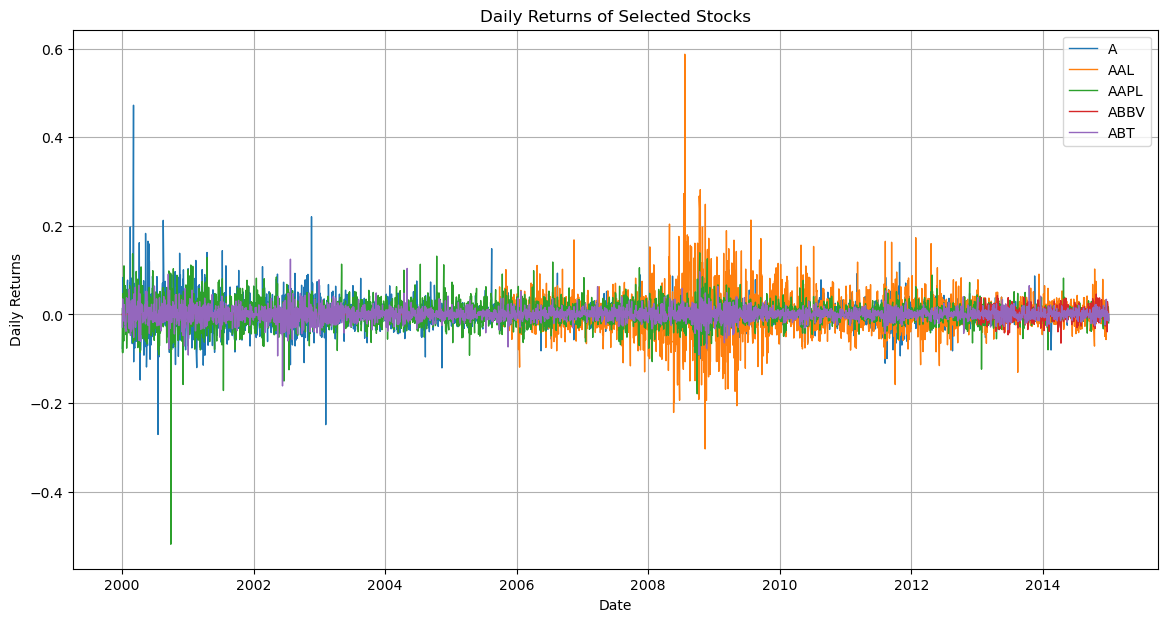


Spot Check for A:
Date
2000-01-04   -0.076389
2000-01-05   -0.062030
2000-01-06   -0.038076
2000-01-07    0.083333
2000-01-10    0.060577
Name: A, dtype: float64

Manual Calculation Check:
Date: 2000-01-05 00:00:00, Calculated Return: -0.062030, Manual Return: -0.076389
Date: 2000-01-06 00:00:00, Calculated Return: -0.038076, Manual Return: -0.062030
Date: 2000-01-07 00:00:00, Calculated Return: 0.083333, Manual Return: -0.038076
Date: 2000-01-10 00:00:00, Calculated Return: 0.060577, Manual Return: 0.083333
Date: 2000-01-11 00:00:00, Calculated Return: -0.013599, Manual Return: 0.060577
Stock with the highest mean returns:
MNST: 0.0021288969575982615
Stock with the lowest sum of deviations:
CFG: 0.7092628225770986


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# List of stock tickers (replace with actual tickers)
def get_sp500_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    df = table[0]
    tickers = df['Symbol'].tolist()
    return tickers

tickers = get_sp500_tickers()

# Fetch historical data from Yahoo Finance
data = yf.download(tickers, start='2000-01-01', end=pd.Timestamp.today().strftime('2015-01-01'), interval='1d')['Adj Close']

# Handle missing values by forward filling
data = data.fillna(method='ffill').fillna(method='bfill')

# Calculate the number of non-NaN values for each stock
non_nan_counts = data.notna().sum()

# Filter out stocks that do not have at least half of the data points
required_data_points = data.shape[0] / 2
filtered_tickers = non_nan_counts[non_nan_counts >= required_data_points].index

# Filter the data to include only the stocks that meet the requirement
filtered_data = data[filtered_tickers]

# Check for any remaining NaNs and drop columns with all NaNs
filtered_data = filtered_data.dropna(axis=1, how='all')

# Calculate daily returns
returns = filtered_data.pct_change().dropna()

# Check for errors or unrealistic values in the returns
print("Summary Statistics of Returns:")
print(returns.describe())

# Plot the returns of a few stocks for visual inspection
plt.figure(figsize=(14, 7))
plt.plot(returns.index, returns.iloc[:, :5], lw=1)  # Plotting the first 5 stocks
plt.title('Daily Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(returns.columns[:5])
plt.grid(True)
plt.show()

# Spot check calculations for a particular stock
stock = returns.columns[0]  # Select the first stock for spot check
print(f"\nSpot Check for {stock}:")
print(returns[stock].head())

# Recalculate returns manually for the first few days
print("\nManual Calculation Check:")
for i in range(1, 6):
    manual_return = (filtered_data[stock].iloc[i] - filtered_data[stock].iloc[i-1]) / filtered_data[stock].iloc[i-1]
    print(f"Date: {returns.index[i]}, Calculated Return: {returns[stock].iloc[i]:.6f}, Manual Return: {manual_return:.6f}")

# Calculate mean returns
mean_returns = np.mean(returns, axis=0)

# Calculate absolute deviations from mean returns
abs_dev = np.abs(returns - mean_returns)

# Identify the stock with the highest mean returns
max_returns_stock = mean_returns.idxmax()
print("Stock with the highest mean returns:")
print(f"{max_returns_stock}: {mean_returns[max_returns_stock]}")

# Identify the stock with the lowest sum of deviations
sum_devs = np.sum(abs_dev, axis=0)
min_deviation_stock = sum_devs.idxmin()
print("Stock with the lowest sum of deviations:")
print(f"{min_deviation_stock}: {sum_devs[min_deviation_stock]}")

In [2]:
mean_returns

Ticker
A       0.000411
AAL     0.001001
AAPL    0.001304
ABBV    0.000200
ABT     0.000516
          ...   
XYL     0.000160
YUM     0.000778
ZBH     0.000505
ZBRA    0.000570
ZTS     0.000103
Length: 470, dtype: float64

In [3]:
abs_dev

Ticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.076800,0.001001,0.085614,0.000200,0.029088,0.006297,0.000709,0.084738,0.051128,0.011117,...,0.000492,0.038002,0.001163,0.022497,0.019601,0.000160,0.020878,0.000505,0.014999,0.000103
2000-01-05,0.062442,0.001001,0.013329,0.000200,0.002355,0.092034,0.000709,0.018922,0.014060,0.016491,...,0.000492,0.052540,0.001163,0.038054,0.054070,0.000160,0.004350,0.000505,0.018574,0.000103
2000-01-06,0.038487,0.001001,0.087842,0.000200,0.034474,0.010862,0.000709,0.007314,0.027877,0.004647,...,0.000492,0.046345,0.001163,0.009818,0.051250,0.000160,0.009281,0.000505,0.054714,0.000103
2000-01-07,0.082922,0.001001,0.046065,0.000200,0.010160,0.054694,0.000709,0.047734,0.027569,0.015257,...,0.000492,0.033319,0.001163,0.000530,0.003381,0.000160,0.023076,0.000505,0.011668,0.000103
2000-01-10,0.060165,0.001001,0.018892,0.000200,0.007558,0.032631,0.000709,0.037761,0.086512,0.000701,...,0.000492,0.004793,0.001163,0.000530,0.014427,0.000160,0.039572,0.000505,0.033098,0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.006213,0.023297,0.006014,0.028704,0.000954,0.004879,0.001803,0.003991,0.000344,0.001830,...,0.001375,0.000659,0.006371,0.022049,0.009009,0.000873,0.000735,0.007088,0.002632,0.020144
2014-12-26,0.005667,0.009304,0.016373,0.011429,0.002766,0.004559,0.001366,0.001786,0.008121,0.005136,...,0.000934,0.000161,0.004675,0.009131,0.006525,0.004742,0.004030,0.000021,0.003507,0.008109
2014-12-29,0.001620,0.016127,0.002006,0.002189,0.005969,0.002005,0.008817,0.008081,0.004092,0.006129,...,0.002844,0.000162,0.016328,0.017786,0.001948,0.002471,0.004964,0.006374,0.001210,0.004402


# Linear & Quadratic Programme For Stock Returns

#### Optimisation Notation
Stocks = i

Weights = W_i

#### Objective Function:

Minimise Σ W_i Σ(R_ij - MR_i)

E.g

Taking absolute values:  
W_1(R_1j - MR_1) + W_2(R_2j - MR_2) ... W_i(R_ij - MR_i)

#### Subject to:

Σ(W_i) = 1

W_i >= 0

W_i <= 0.016

In [4]:
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Calculate mean returns
mean_returns = np.mean(returns, axis=0)

# Calculate absolute deviations from mean returns
abs_dev = np.abs(returns - mean_returns)

# This should correctly align dimensions: abs_dev has shape (n_samples, n_assets)
objective = cp.Minimize(cp.sum(cp.matmul(abs_dev, weights)))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
    weights <= 0.016
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)  # Using SCS solver
end_time = time.time()

# Output the optimized weights
lp_optimal_weights = weights.value
print("\nOptimised Weights (non-scientific notation):")

optimised_weight_threshold = 1e-5

# Initialize an empty dictionary
lp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(filtered_data.columns, lp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        lp_portfolio[stock] = weight

# Normalize the filtered weights to sum to 1
total_weight = sum(lp_portfolio.values())
lp_portfolio = {k: v / total_weight for k, v in lp_portfolio.items()}

print(lp_portfolio)

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"\nComputational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")
print(f"Optimal Value: {problem.value:.4f}\n")


Optimised Weights (non-scientific notation):
{'ABBV': 0.01599999998432587, 'ALLE': 0.015999999981916542, 'AMCR': 0.015999999982654608, 'ANET': 0.015999999982574755, 'APTV': 0.015999999986394873, 'AVGO': 0.015999999995246438, 'AWK': 0.015999999991367777, 'BR': 0.015999999996451658, 'CBOE': 0.01599999998892302, 'CDW': 0.015999999983111288, 'CFG': 0.015999999980380496, 'CHTR': 0.015999999990052114, 'CPAY': 0.01599999998936263, 'CTLT': 0.01599999998117491, 'CZR': 0.015999999980708803, 'DG': 0.015999999990186663, 'ED': 0.01600000000040105, 'ENPH': 0.015999999996486776, 'EPAM': 0.015999999988719673, 'FANG': 0.015999999987938524, 'FTNT': 0.015999999996350312, 'GIS': 0.015999999999891337, 'GM': 0.015999999989730125, 'GNRC': 0.01599999999445738, 'HCA': 0.015999999990218536, 'HII': 0.015999999987520348, 'HLT': 0.015999999981810738, 'IQV': 0.01599999998285225, 'JNJ': 0.016000000000547104, 'KDP': 0.01599999999304236, 'KEYS': 0.015999999980405674, 'KKR': 0.015999999991671354, 'KMB': 0.016000000002

In [5]:
# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [filtered_data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalize the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(lp_filtered_weights)
print(lp_filtered_names)

[0.01599999998432587, 0.015999999981916542, 0.015999999982654608, 0.015999999982574755, 0.015999999986394873, 0.015999999995246438, 0.015999999991367777, 0.015999999996451658, 0.01599999998892302, 0.015999999983111288, 0.015999999980380496, 0.015999999990052114, 0.01599999998936263, 0.01599999998117491, 0.015999999980708803, 0.015999999990186663, 0.01600000000040105, 0.015999999996486776, 0.015999999988719673, 0.015999999987938524, 0.015999999996350312, 0.015999999999891337, 0.015999999989730125, 0.01599999999445738, 0.015999999990218536, 0.015999999987520348, 0.015999999981810738, 0.01599999998285225, 0.016000000000547104, 0.01599999999304236, 0.015999999980405674, 0.015999999991671354, 0.01600000000203378, 0.0159999999866471, 0.015999999995287006, 0.01599999999324784, 0.016000000000514925, 0.015999999989178563, 0.008000000580813538, 0.01599999999009883, 0.01600000000062716, 0.015999999984147566, 0.01599999998931051, 0.015999999982314946, 0.015999999982516243, 0.015999999996638977, 0.

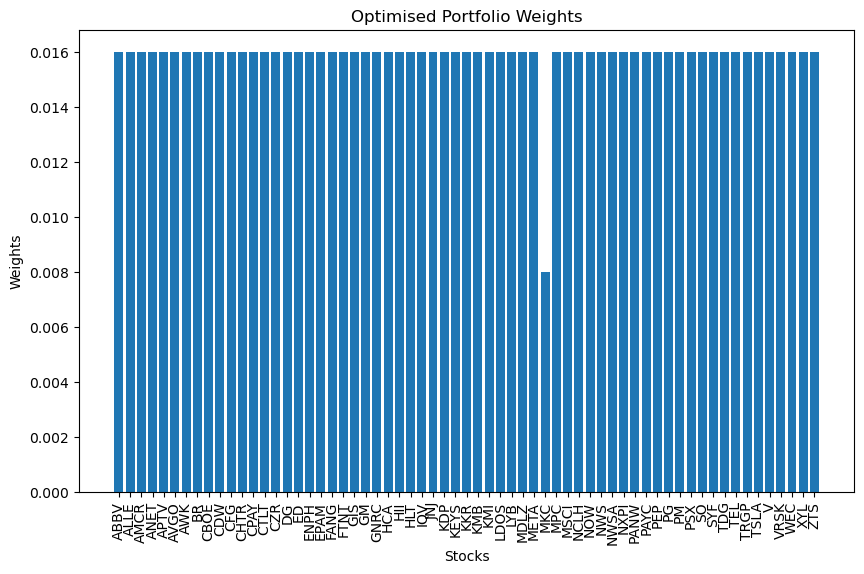

In [6]:
# Assuming lp_filtered_weights and lp_filtered_names are already calculated as shown in the previous code
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(lp_filtered_weights)), lp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio Weights')
plt.xticks(range(len(lp_filtered_weights)), lp_filtered_names, rotation=90)
plt.show()

In [12]:
num_stocks = len(lp_filtered_names)
print(f"Number of stocks in the portfolio: {num_stocks}")

Number of stocks in the portfolio: 63


In [13]:
np.sum(lp_filtered_weights)

0.9999999999999998

## Time-Series of Linear Programme Optimised Portfolio Cumulative Returns.

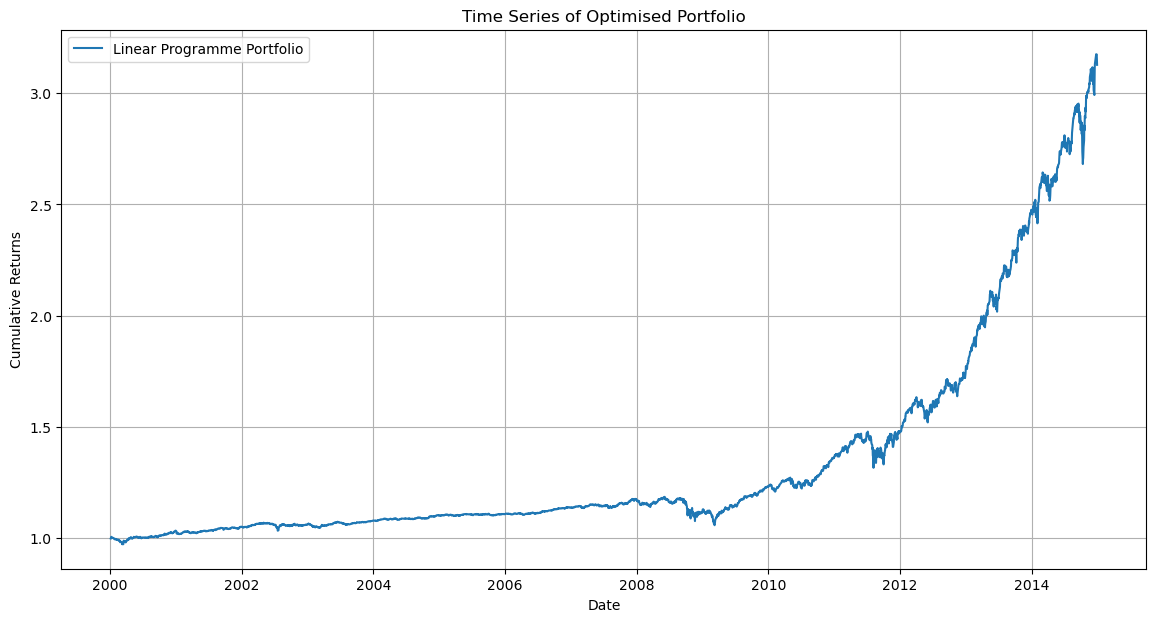

In [77]:
# Calculate portfolio returns using filtered weights
def calculate_portfolio_returns(weights, returns):
    return (returns * weights).sum(axis=1)

lp_portfolio_returns = calculate_portfolio_returns(lp_filtered_weights, returns[lp_filtered_names])

# Plot the time series of the optimized portfolio
plt.figure(figsize=(14, 7))
plt.plot(lp_portfolio_returns.index, (1 + lp_portfolio_returns).cumprod(), label='Linear Programme Portfolio')
plt.title('Time Series of Optimised Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("LP_TimeSeries")
plt.show()

In [ ]:
MLR = np.mean(lp_portfolio_returns)

In [47]:
print(f"Mean Returns of Linear Portfolio: {MLR}")

Mean Returns of Linear Portfolio: 0.0003110345774253569


# Quadratic Model

### Optimization Notation
Let 𝑁 be the number of stocks. 
Let W_𝑖 be the weight of stock i in the portfolio.
Let Σ be the covariance matrix of stock returns, where Σ𝑖𝑗 represents the covariance between the returns of stock and stock 𝑗.

#### Objective Function

Minimize the portfolio variance, which is given by:

        
minimize ∑_j ∑_i W_iW_jΣij 
         

This can also be written using matrix notation as:

minimize 

wTΣw

where 𝑤 is the vector of weights.

#### Subject to

Σ(W_i) = 1

W_i >= 0

W_i <= 0.0214

In [18]:
# Calculate the covariance matrix of returns
cov_matrix = np.cov(returns.T)
print("Covariance Matrix (non-scientific notation):")
for row in cov_matrix:
    print([f"{cov:.5f}" for cov in row])

Covariance Matrix (non-scientific notation):
['0.00091', '0.00024', '0.00030', '0.00001', '0.00007', '0.00011', '0.00019', '0.00037', '0.00046', '0.00015', '0.00017', '0.00034', '0.00009', '0.00010', '0.00025', '0.00023', '0.00029', '0.00015', '0.00011', '0.00055', '0.00025', '0.00027', '0.00019', '0.00001', '0.00042', '-0.00000', '0.00052', '0.00023', '0.00018', '0.00022', '0.00033', '0.00037', '0.00001', '0.00025', '0.00013', '0.00022', '0.00020', '0.00020', '0.00034', '0.00002', '0.00019', '0.00012', '0.00018', '0.00008', '0.00019', '0.00006', '0.00024', '0.00028', '0.00014', '0.00020', '0.00030', '0.00016', '0.00009', '0.00025', '0.00032', '0.00011', '0.00028', '0.00015', '0.00029', '0.00016', '0.00027', '0.00043', '0.00022', '0.00027', '0.00023', '0.00012', '0.00011', '0.00014', '0.00020', '0.00027', '0.00020', '0.00019', '0.00034', '0.00007', '0.00013', '0.00026', '0.00019', '0.00004', '0.00029', '0.00035', '0.00024', '0.00035', '0.00001', '0.00023', '0.00018', '0.00000', '0.0001

In [72]:
matrix_dimensions = cov_matrix.shape
print(matrix_dimensions)

(470, 470)


In [19]:
# Optimization process
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])
binary_vars = cp.Variable(returns.shape[1], boolean=True)

# Define the objective function (minimize the portfolio variance)
objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0, # Weights must be non-negative
    weights <= 0.0214
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)  # Using SCS solver instead of GUROBI
end_time = time.time()

# Output the optimized weights
qp_optimal_weights = weights.value
print("\nOptimised Weights (non-scientific notation):")

optimised_weight_threshold = 1e-5

# Initialize an empty dictionary
qp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(filtered_data.columns, qp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        qp_portfolio[stock] = weight

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_portfolio.values())
qp_portfolio = {k: v / total_weight for k, v in qp_portfolio.items()}

print(qp_portfolio)

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"\nComputational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")
print(f"Optimal Value: {problem.value:.4f}\n")

# Filter the weights and corresponding stock names
qp_filtered_weights = [w for w in qp_optimal_weights if w > optimised_weight_threshold]
qp_filtered_names = [filtered_data.columns[i] for i in range(len(qp_optimal_weights)) if qp_optimal_weights[i] > optimised_weight_threshold]

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_filtered_weights)
qp_filtered_weights = [w / total_weight for w in qp_filtered_weights]

print(qp_filtered_weights)
print(qp_filtered_names)


Optimised Weights (non-scientific notation):
{'ABBV': 0.02140653140838657, 'ACGL': 0.0021174207434078653, 'ALLE': 0.021406427457747842, 'AMCR': 0.021406351951536545, 'ANET': 0.02140643973724785, 'APTV': 0.02140648395953197, 'AWK': 0.021406907445705056, 'CAG': 0.01180506401945823, 'CBOE': 0.021406605230584828, 'CDW': 0.021406437262791147, 'CFG': 0.021406381959458393, 'CHD': 0.0030220832444903083, 'CHTR': 0.02140656628909481, 'CLX': 0.00819674332969566, 'CPAY': 0.021406588363716877, 'CTLT': 0.021406412149873953, 'CZR': 0.02140640103193861, 'DG': 0.021406523823179844, 'ED': 0.021405556612571056, 'EPAM': 0.02140648977347642, 'FANG': 0.021406551272289822, 'GIS': 0.02140630666131746, 'GM': 0.02141084578260882, 'GNRC': 5.313324097136293e-05, 'HCA': 0.02140650840929313, 'HII': 0.021406550777163916, 'HLT': 0.021406401056325734, 'HRL': 0.0011793544235135392, 'HSY': 0.00041414359585583273, 'IQV': 0.021406459863092482, 'JNJ': 6.980486916375655e-05, 'K': 0.002759507596446534, 'KDP': 0.021406754449

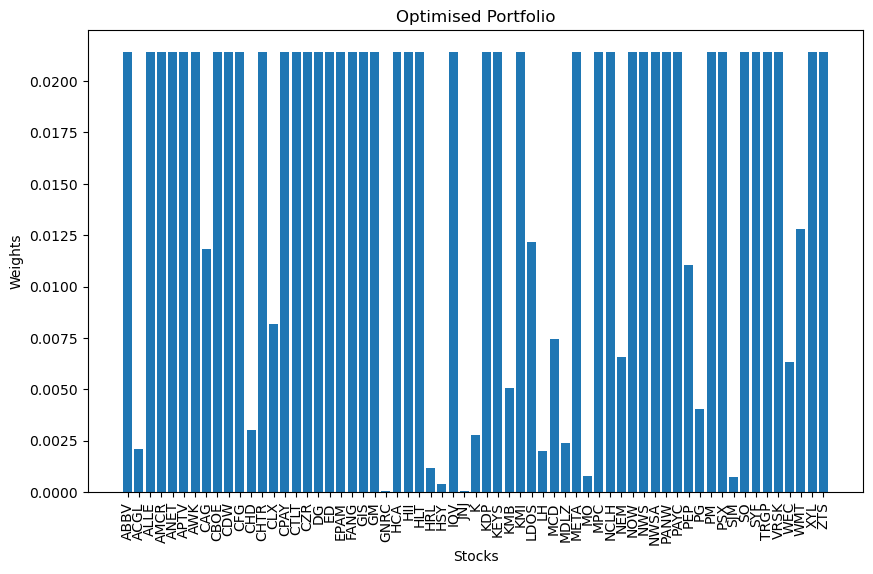

In [74]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(qp_filtered_weights)), qp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio')
plt.xticks(range(len(qp_filtered_weights)), qp_filtered_names, rotation=90)
plt.show()

In [21]:
num_stocks = len(qp_filtered_names)
print(f"Number of stocks in the portfolio: {num_stocks}")

Number of stocks in the portfolio: 63


In [22]:
np.sum(qp_filtered_weights)

1.0000000000000002

Both portfolios now have 63 stocks in the portfolio with the only differing constraints between them being weights <= 0.016 for the LP and weights <= 0.0214 for the QP. 

## Time-Series of Quadratic Programme Portofolio Cumulative Returns.

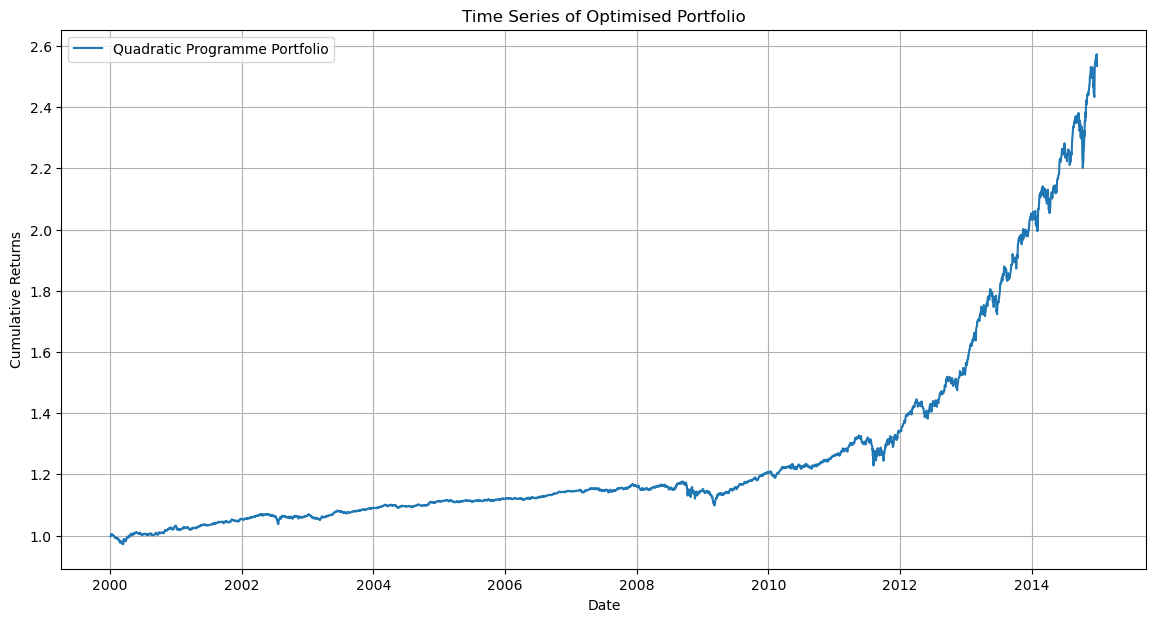

In [76]:
# Calculate portfolio returns using filtered weights
def calculate_portfolio_returns(weights, returns):
    return (returns * weights).sum(axis=1)

qp_portfolio_returns = calculate_portfolio_returns(qp_filtered_weights, returns[qp_filtered_names])

# Plot the time series of the optimized portfolio
plt.figure(figsize=(14, 7))
plt.plot(qp_portfolio_returns.index, (1 + qp_portfolio_returns).cumprod(), label='Quadratic Programme Portfolio')
plt.title('Time Series of Optimised Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("QP_TimeSeries")
plt.show()

In [48]:
MQR = np.mean(qp_portfolio_returns)

In [49]:
print(f"Mean Returns of Quadratic Portfolio: {MQR}")

Mean Returns of Quadratic Portfolio: 0.00025177514632324983


## Time-Series of Both Linear & Quadtatic Optimised Portofolios' Cumulative Returns.

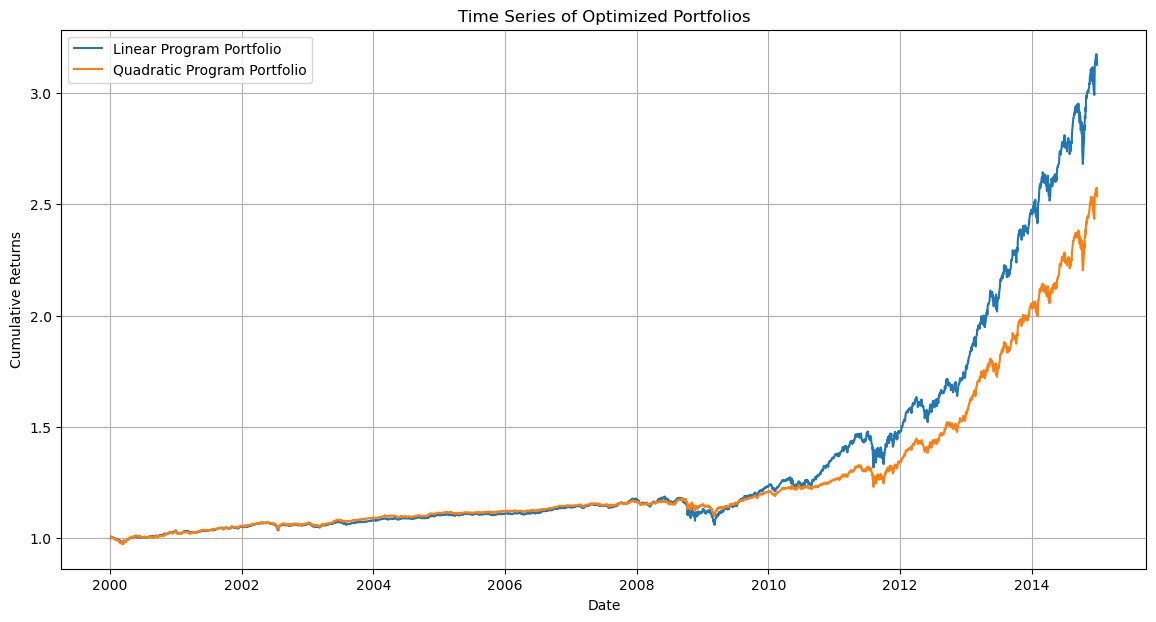

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming lp_optimal_weights and qp_optimal_weights are already calculated as shown in the previous code

# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return (returns * weights).sum(axis=1)

# Calculate portfolio returns
lp_portfolio_returns = calculate_portfolio_returns(lp_optimal_weights, returns)
qp_portfolio_returns = calculate_portfolio_returns(qp_optimal_weights, returns)

# Plot the time series of both portfolios
plt.figure(figsize=(14, 7))
plt.plot(lp_portfolio_returns.index, (1 + lp_portfolio_returns).cumprod(), label='Linear Program Portfolio')
plt.plot(qp_portfolio_returns.index, (1 + qp_portfolio_returns).cumprod(), label='Quadratic Program Portfolio')
plt.title('Time Series of Optimized Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("Time Series of Optimised Portfolios")
plt.show()

In [71]:
# Format the variances to avoid scientific notation
formatted_MLR = "{:.10f}".format(MLR)
formatted_MQR = "{:.10f}".format(MQR)

print(f"Mean Returns of Linear Portfolio: {formatted_MLR} \nMean Returns of Quadratic Portfolio: {formatted_MQR}")

if MQR > MLR:
    print("The Mean Returns of the Quadratic Portfolio are greater than the Linear Portfolio")
elif MLR > MQR:
    print("The Mean Returns of the Linear Portfolio are greater than the Quadratic Portfolio")
else:
    print("The Mean Returns of both Portfolios are identical")    

Mean Returns of Linear Portfolio: 0.0003110346 
Mean Returns of Quadratic Portfolio: 0.0002517751
The Mean Returns of the Linear Portfolio are greater than the Quadratic Portfolio


In [80]:
LPVAR = np.var(lp_portfolio_returns)
QPVAR = np.var(qp_portfolio_returns)

# Format the variances to avoid scientific notation
formatted_LPVAR = "{:.10f}".format(LPVAR)
formatted_QPVAR = "{:.10f}".format(QPVAR)

print(f"Variance of Linear Portfolio Returns: {formatted_LPVAR}")
print(f"Variance of Quadratic Portfolio Returns: {formatted_QPVAR}")

if QPVAR > LPVAR:
    print("The Variance of the Quadratic Portfolio is greater than the Linear Portfolio")
elif LPVAR > QPVAR:
    print("The Variance of the Linear Portfolio is greater than the Quadratic Portfolio")
else:
    print("The Variances of both Portfolios are identical")  

Variance of Linear Portfolio Returns: 0.0000174072
Variance of Quadratic Portfolio Returns: 0.0000103496
The Variance of the Linear Portfolio is greater than the Quadratic Portfolio
